/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/3303511786.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


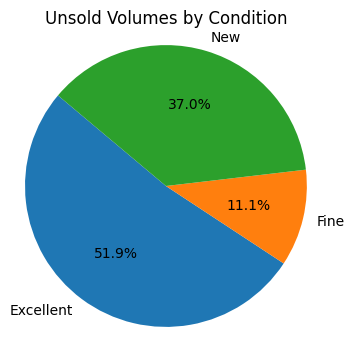

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to DB
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query for unsold volumes by condition
query = """
SELECT c.condition_description, COUNT(*) AS count
FROM volume 
JOIN condition_codes c ON volume.condition_code = c.condition_code
LEFT JOIN sale s ON volume.sale_id = s.sale_id
WHERE volume.sale_id IS NULL
GROUP BY c.condition_description;
"""

# Read SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Plot a pie chart
plt.figure(figsize=(4,4))
plt.pie(df['count'], labels=df['condition_description'], autopct='%1.1f%%', startangle=140)
plt.title('Unsold Volumes by Condition')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/3624088031.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


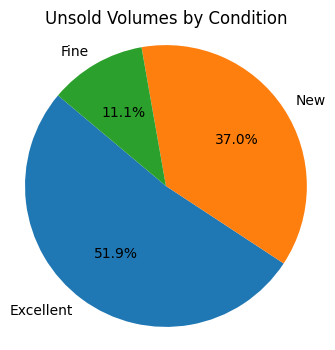

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to DB
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query for unsold volumes by condition
query = """
SELECT c.condition_description, COUNT(*) AS unsold_count
FROM volume 
JOIN condition_codes c ON volume.condition_code = c.condition_code
WHERE volume.sale_id IS NULL
GROUP BY c.condition_description
ORDER BY unsold_count DESC;
"""

# Read SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(df['unsold_count'], labels=df['condition_description'], autopct='%1.1f%%', startangle=140)
plt.title('Unsold Volumes by Condition')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/511643734.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/511643734.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


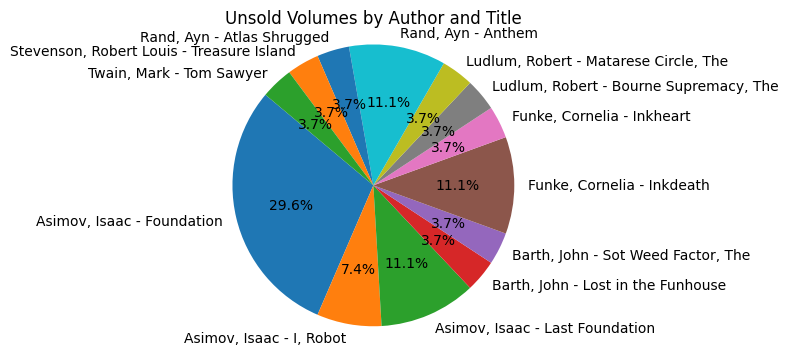

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to DB
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query for unsold volumes by author and title
query = """
SELECT a.author_last_first AS author, w.title, COUNT(*) AS count
FROM volume v
JOIN book b ON v.isbn = b.isbn
JOIN work w ON b.work_numb = w.work_numb
JOIN author a ON w.author_numb = a.author_numb
WHERE v.sale_id IS NULL
GROUP BY a.author_last_first, w.title
ORDER BY a.author_last_first ASC, w.title ASC;
"""

# Read SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create combined labels
df['label'] = df['author'] + ' - ' + df['title']

# Plot a pie chart
plt.figure(figsize=(4,4))
plt.pie(df['count'], labels=df['label'], autopct='%1.1f%%', startangle=140)
plt.title('Unsold Volumes by Author and Title')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/520726977.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/520726977.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


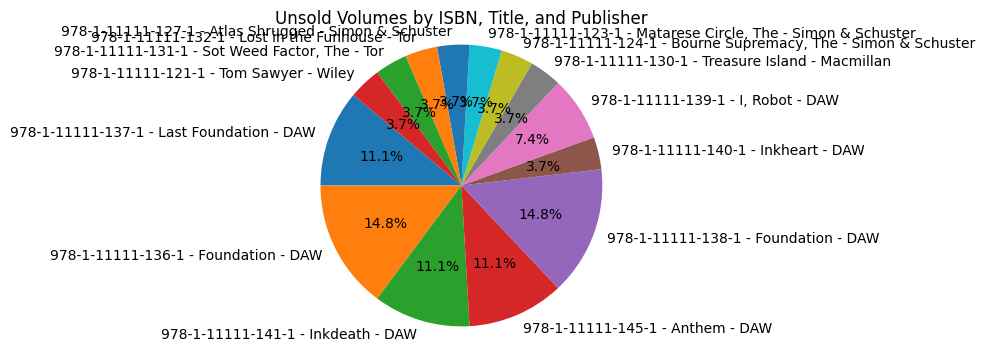

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to DB
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query for unsold volumes by ISBN, title, and publisher
query = """
SELECT b.ISBN, w.title, p.publisher_name, b.edition, b.binding, b.copyright_year, COUNT(*) AS stock_count
FROM volume v
JOIN book b ON v.ISBN = b.ISBN
JOIN work w ON b.work_numb = w.work_numb
JOIN publisher p ON b.publisher_id = p.publisher_id
WHERE v.sale_id IS NULL
GROUP BY b.ISBN, w.title, p.publisher_name, b.edition, b.binding, b.copyright_year
ORDER BY p.publisher_name ASC;
"""

# Read SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Create combined labels (ISBN, Title, Publisher)
df['label'] = df['ISBN'].astype(str) + ' - ' + df['title'] + ' - ' + df['publisher_name']

# Plot a pie chart (You can choose another plot type if needed)
plt.figure(figsize=(4,4))
plt.pie(df['stock_count'], labels=df['label'], autopct='%1.1f%%', startangle=140)
plt.title('Unsold Volumes by ISBN, Title, and Publisher')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/30588747.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


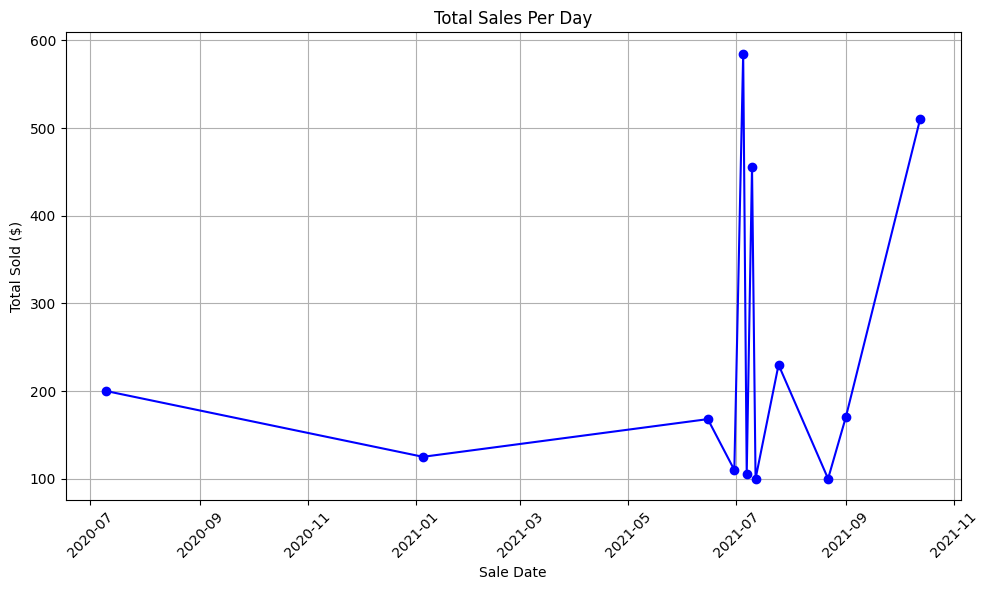

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to DB
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query to calculate total sales per day
query = """
SELECT s.sale_date, SUM(v.selling_price) AS total_sold
FROM sale s
JOIN volume v ON s.sale_id = v.sale_id
GROUP BY s.sale_date
ORDER BY s.sale_date ASC;
"""

# Read SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Plot the total sales per day
plt.figure(figsize=(10, 6))
plt.plot(df['sale_date'], df['total_sold'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Per Day')
plt.xlabel('Sale Date')
plt.ylabel('Total Sold ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


    inventory_id                                title condition_description  \
0             19  Adventures of Huckleberry Finn, The             Excellent   
1              6                               Anthem             Excellent   
2             37                           Foundation                  Fine   
3             21                    Fountainhead, The             Excellent   
4             35                    Fountainhead, The                   New   
5              3                       Giles Goat Boy             Excellent   
6             34                       Giles Goat Boy                   New   
7             62            Hound of the Baskervilles             Excellent   
8             22                             I, Robot             Excellent   
9              1                            Jane Eyre                  Fine   
10            39                 Lost in the Funhouse                  Fine   
11            14                           Tom Sawye

/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/650186384.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


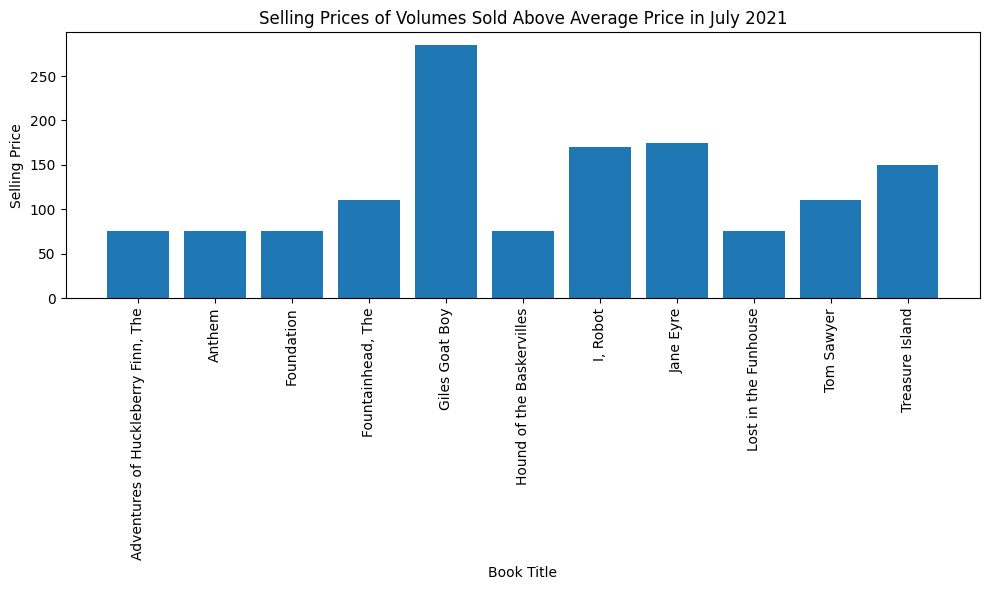

In [13]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Connect to the database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query to get volumes sold for a price greater than the average selling price in July 2021
query = """
SELECT v.inventory_id, w.title, cc.condition_description, v.selling_price
FROM volume v
JOIN book b ON v.ISBN = b.ISBN
JOIN work w ON b.work_numb = w.work_numb
JOIN condition_codes cc ON v.condition_code = cc.condition_code
JOIN sale s ON v.sale_id = s.sale_id
WHERE v.selling_price > (
    SELECT AVG(v2.selling_price)
    FROM volume v2
    JOIN sale s2 ON v2.sale_id = s2.sale_id
    WHERE s2.sale_date BETWEEN '2021-07-01' AND '2021-07-31'
)
ORDER BY w.title ASC;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
print(df)

# Optional: If you want to plot the selling prices of these volumes
plt.figure(figsize=(10, 6))
plt.bar(df['title'], df['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Selling Price')
plt.title('Selling Prices of Volumes Sold Above Average Price in July 2021')
plt.tight_layout()
plt.show()


/var/folders/1t/qm5qjvf57j9g7k8wkd8hp8q40000gn/T/ipykernel_5057/4236033046.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                     author                                title  copies_sold  \
0           Funke, Cornelia                             Inkdeath            4   
1                 Rand, Ayn                    Fountainhead, The            3   
2                 Rand, Ayn                       Atlas Shrugged            3   
3   Stevenson, Robert Louis                      Treasure Island            2   
4             Asimov, Isaac                             I, Robot            2   
5               Barth, John                       Giles Goat Boy            2   
6          Stephenson, Neal                        Cryptonomicon            1   
7               Twain, Mark  Adventures of Huckleberry Finn, The            1   
8               Barth, John                 Sot Weed Factor, The            1   
9               Barth, John                 Lost in the Funhouse            1   
10  Stevenson, Robert Louis                            Kidnapped            1   
11           Ludlum, Robert 

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

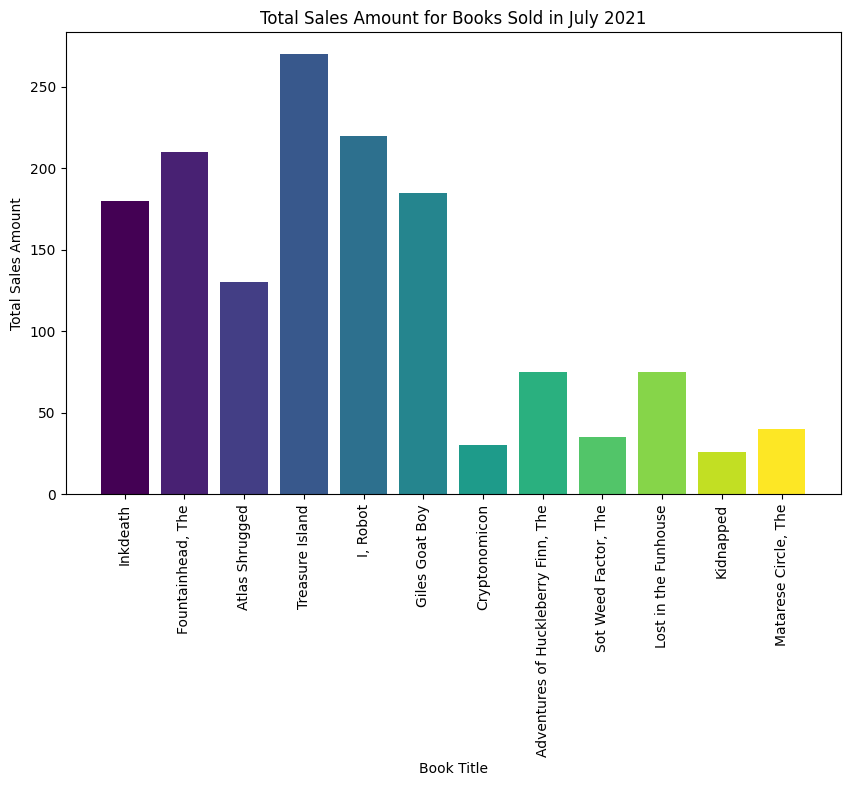

In [16]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='aashituli',
    database='rarebooks'
)

# SQL query to get the author, title, copies sold, and total sales amount for July 2021
query = """
SELECT a.author_last_first AS author, w.title, COUNT(*) AS copies_sold, SUM(v.selling_price) AS total_sales_amount
FROM volume v
JOIN book b ON v.ISBN = b.ISBN
JOIN work w ON b.work_numb = w.work_numb
JOIN author a ON w.author_numb = a.author_numb
JOIN sale s ON v.sale_id = s.sale_id
WHERE s.sale_date BETWEEN '2021-07-01' AND '2021-07-31'
GROUP BY a.author_last_first, w.title
ORDER BY copies_sold DESC;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
print(df)

# Create a colormap for a colorful bar chart
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

# Plot the bar chart with the colors
plt.figure(figsize=(10, 6))
bars = plt.bar(df['title'], df['total_sales_amount'], color=colors)

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount for Books Sold in July 2021')

# Add a color bar to the plot
plt.colorbar(bars, label='Sales Amount')

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()
